In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-superstore-20152018/Dataset- Superstore (2015-2018).csv


# Prefaces:

This kernel is prepared to be a container of many broad topics in the field of Time Series.

My motive is to make this the ultimate reference to Times Series analysis for beginners.

This kernel is a work in progress so every time you see on your home feed and open it, you will find some new updated content.

If there is any suggestion or any specific topic you would like me to cover, kindly mention that in the comments.

If you like my work, please upvote(press the like button) this kernel so it looks more relevant and meaningful to the community.

Thank you and together keep up the momentum!

# TABLE OF CONTENT:

# <a href='#I'>  I.TIME SERIES: THEORY </a>

## <a href='#1'> 1. INTRODUCTION </a>
### <a href='#1.1'> 1.1. What is Time Series </a>
### <a href='#1.2'> 1.2 What makes Time Series Special </a>
## <a href='#2'> 2. BASIC CONCEPTS OF TIME SERIES </a>
### <a href='#2.1'> 2.1. Seasonality </a>
### <a href='#2.2'> 2.2. Trend </a>
### <a href='#2.3'> 2.3. Cyclic </a>
### <a href='#2.4'> 2.4. Random </a>
## <a href = '#3'> 3. STATIONATY vs NON-STATIONARY </a>
### <a href='#3.1'> 3.1. What is Stationary </a>
### <a href='#3.2'> 3.2. How to make a time series stationary </a>
### <a href='#3.3'> 3.3. Why make a non-stationary series stationary before forecasting </a>
## <a href = '#3'> 4. FORECASTING THE TIME SERIES  </a>
# <a href='#II'>  II.TIME SERIES: CODE IMPLEMENTATION </a>
## <a href='#4.1'> 1. Import Neccessary Library </a>
## <a href='#4.2'> 2. Loading Dataset </a>
## <a href='#4.3'> 3. Data Processing </a>
## <a href='#4.4'> 4. Importing with indexing with time series data </a>
## <a href='#4.5'> 5. Data Visualization </a>
## <a href='#4.6'> 6. Check The Stationary the Dataset </a>
## <a href='#4.7'> 7. Make a Time Series Stationary </a>
## <a href='#4.8'> 8. Time series forecasting with ARIMA </a>
## <a href='#4.9'> 8.1 Train-test Split </a>
## <a href='#4.10'>8.2 Hyperparameters of ARIMA model p,d,q using auto_arima </a>
## <a href='#4.11'>8.3 Build ARIMA model </a>
## <a href='#4.12'>8.4 ARIMA Model Evaluation </a>
## <a href='#4.13'>8.5 Plot Prediction Value </a>
## <a href='#9'>9. Time series forecasting with SARIMAX </a>
## <a href='#9.1'>9.1. SARIMA Model Evaluation </a>
## <a href='#9.2'>9.2. Forecast Future Sale </a>

<a href='#I'><h1 align="center"> <span style="color:red"> I.TIME SERIES: THEORY </a></h1></span>

## <a id='1'> 1. INTRODUCTION: </a>

### <a id='1.1'> 1.1. What is Times Series: </a>

Time series is a sequence of observations recorded at regular time intervals. Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual.

Here time is the independent variable while the dependent variable might be

- Stock market data

- Sales data of companies

- Data from the sensors of smart devices

- The measure of electrical energy generated in the powerhouse.

Time series forecasting is basically the machine learning modeling for Time Series data (years, days, hours…etc.)for predicting future values using Time Series modeling.

To gain some useful insights from time-series data, you have to decompose the time series and look for some basic components such as trend, seasonality, cyclic behaviour, and irregular fluctuations. Based on some of these behaviours, we are deciding on which model to choose for time series modelling. 

### <a id='1.2'> 1.2. What makes Time Series Special? </a>

Time Series is different from a regular regression problem in two points:

- It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t apply in this case.


- most Time Series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

Because of the inherent properties of a Time Series, there are various steps involved in analyzing it.

Let’s get a better understanding by exploring somw Basic concept of Time Series



## <a id='2'> 2. BASIC CONCEPTS OF TIME- SERIES </a>
### <a id ='2.1'> 2.1. Seasonality: </a>

A data pattern that repeats itself at regular intervals is called **Seasonality**. Seasonal patterns can be very useful in scenarios like predicting network traffic, road traffic, sales patterns of certain commodities that have high sales in certain seasons, etc.

![](https://www.allaboutrobotix.com/wp-content/uploads/2020/12/Picture2.png)

> Seasonal data with a slightly increasing trend.

### <a id ='2.2'> 2.2. Trend: </a>

A long-term increasing or decreasing pattern in the data points indicates a trend. It could be linear/non-linear. For example, global temperature is at an increasing trend due to global warming.

![](https://www.allaboutrobotix.com/wp-content/uploads/2020/12/Picture1.png)

> Global temperature through the years with an increasing trend.



### <a id ='2.3'> 2.3. Cyclic: </a>

A cycle occurs when the data exhibits rises and falls that are not of a fixed frequency. A cycle is different from seasonality by way of its irregularity in frequency.



### <a id ='2.4'> 2.4. Random: </a>

We know that data cannot be perfect, and we always need to provide leeway for some noise.

![](https://www.allaboutrobotix.com/wp-content/uploads/2020/12/Screen-Shot-2020-12-11-at-3.00.17-PM.png)

## <a id='3'> 3. STATIONARY </a>
### <a id='3.1'> 3.1 What is stationary? </a>



In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. In other words all its statistical properties (mean,variance, standard deviation) remain constant over time. 

![](https://editor.analyticsvidhya.com/uploads/66580Stationary%20vs%20non%20stationary%20time%20series.png)

If you keenly observe the above images you can find the difference between the two plots. In stationary time series the mean, variance, and standard deviation of the observed value over time are almost constant whereas in non-stationary time series this is not the case.

There are a lot of statistical theories to explore stationary series than non-stationary series. 

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

<span style="color:red"> • Constant mean </span>

<span style="color:red"> • Constant variance </span>

<span style="color: red"> • An auto co-variance that does not depend on time. </span>



### <a id='3.2'> 3.2 How to make a time series stationary? </a>

You can make series stationary by:

- Differencing the Series (once or more)

- Take the log of the series

- Take the nth root of the series

- Combination of the above

The most common and convenient method to stationarize the series is by **differencing the series at least once until it becomes approximately stationary**. 

So what is differencing? If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value. If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on. 

For example, consider the following series: [1, 5, 2, 12, 20] 

First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8] 

Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

### <a id='3.3'> 3.3 Why make a non-stationary series stationary before forecasting? </a>

The stationarity of a series can be established by looking at the plot of the series.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary. 

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple implementations of Unit Root tests like:

* Augmented Dickey Fuller test (ADH Test)

* Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

* Philips Perron test (PP Test)

**The most commonly used is the ADF test**,In this test, First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary.


# 4. FORCASTING A TIME SERIES: 

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values .

**We will use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.**

Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .These three parameters account for seasonality, trend, and noise in data.

We can dive into this part more intensively in the Code Implementation section.



# REFERENCE: 
https://www.simplilearn.com/tutorials/python-tutorial/time-series-analysis-in-python#what_is_time_series_analysis

https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

https://www.analyticsvidhya.com/blog/2021/07/time-series-analysis-a-beginner-friendly-guide/#h2_2

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://medium.com/coders-camp/10-machine-learning-projects-on-time-series-forecasting-ee0368420ccd

https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

# <h1 align="center"> <span style="color:red"> II.TIME SERIES: CODE IMPLEMENTATION</span> </h1>

Here we are going to take the dataset containing a daily Sales and Profit of a Superstore in 4 year from 2015 to 2018



 # <a id='4.1'> 1. Importing Necessary libraries </a>

In [2]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

# <a id='4.2'> 2. Loading Dataset </a>

In [3]:
df=pd.read_csv('../input/dataset-superstore-20152018/Dataset- Superstore (2015-2018).csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014/01/21,2014/01/23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017/02/26,2017/03/03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### We will take a look of the 'categories'  variable to see what kind of product the store is selling:

In [4]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

## There are several Categories in the Superstore sale data, we will start from time series analysis and forcasting foe the 'Office Supplies' sales:

In [5]:
OS= df.loc[df['Category']=='Office Supplies']
OS.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


### We have a four year of Office Supplies data:

In [6]:
print('Starting date:',OS['Order Date'].min())
print('Ending date:',OS['Order Date'].max())

Starting date: 2014/01/03
Ending date: 2017/12/30


# <a id='4.3'> 3. Data Processing </a>

### In this process, we will removing unrelevant variables, handling missing data, aggregate sales by date.

### Our focus in this kernel is the Sale of Office Supplier over the time series. Therefore, we will skip only two columns:Oder Date and Sales 

In [7]:
# Drop unrelevant variables:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


OS.drop(cols, axis=1, inplace= True)
OS

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [8]:
### Check out missing values:
OS.isnull().sum()

Order Date    0
Sales         0
dtype: int64

### There are no missing values, so we move to the next step.

### Aggregate sum of Office Supplies by date:

In [9]:
OS= OS.groupby('Order Date')['Sales'].sum().reset_index()
OS.head()

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430


https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20Forecastings.ipynb
    

# <a id='4.4'> 4. Import Data with indexing time series data </a>

In [10]:
OS['Order Date'] = pd.to_datetime(df['Order Date'])
OS= OS.set_index('Order Date')
OS

,Sales
Order Date,
2016-11-08,16.448
2016-11-08,288.060
2016-06-12,19.536
2015-10-11,685.340
2015-10-11,10.430
...,...
2014-09-29,814.594
2014-09-29,13.248
2014-09-29,1091.244


# <a id='4.5'> 5. Data Visualization </a>

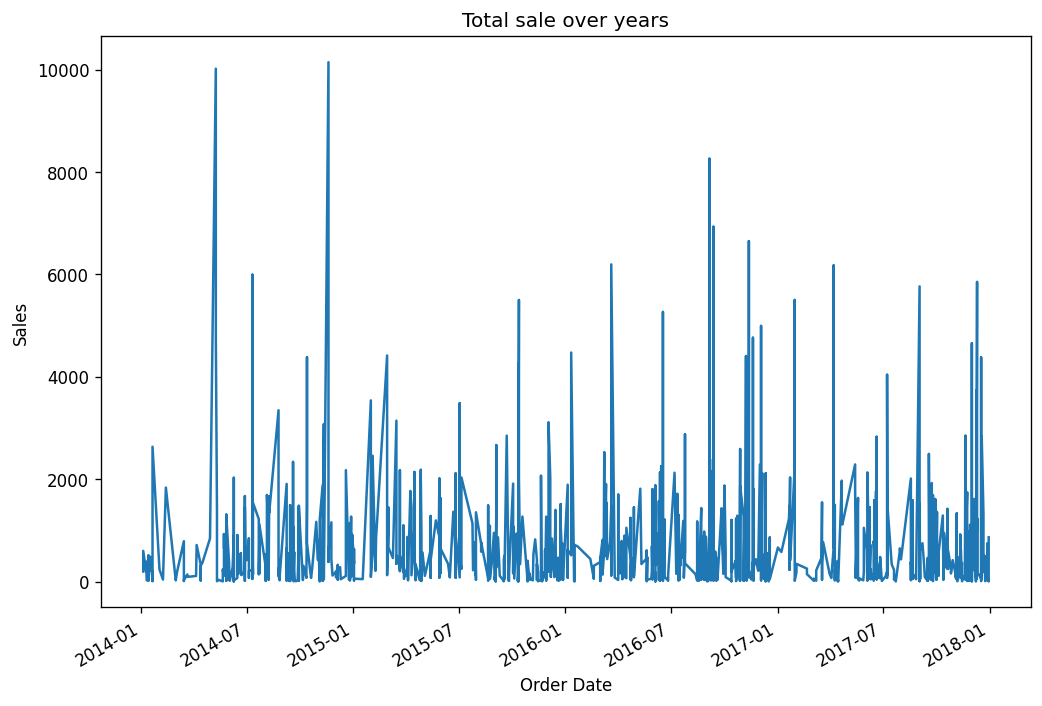

In [11]:
OS['Sales'].plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

### The above is quite busy to interpret, we should use the resample function the time series data by Month and use the averages monthly values 

In [12]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['Sales'] = OS['Sales'].resample('MS').mean()

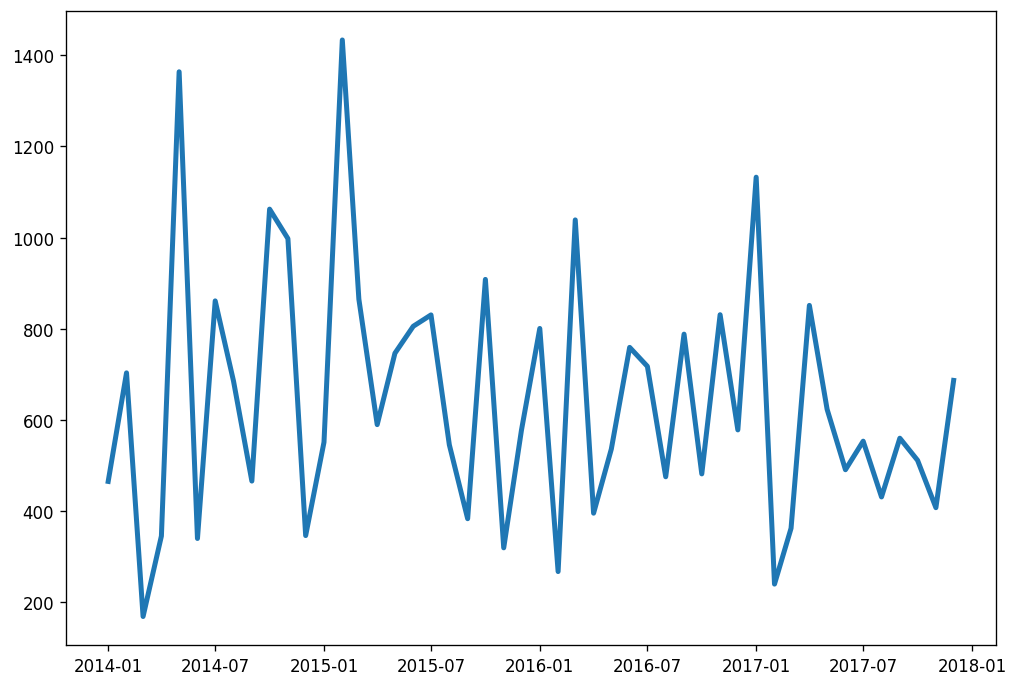

In [13]:
#plot weekly sales data
plt.plot(monthly_OS.index, monthly_OS.Sales, linewidth=3)

## Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

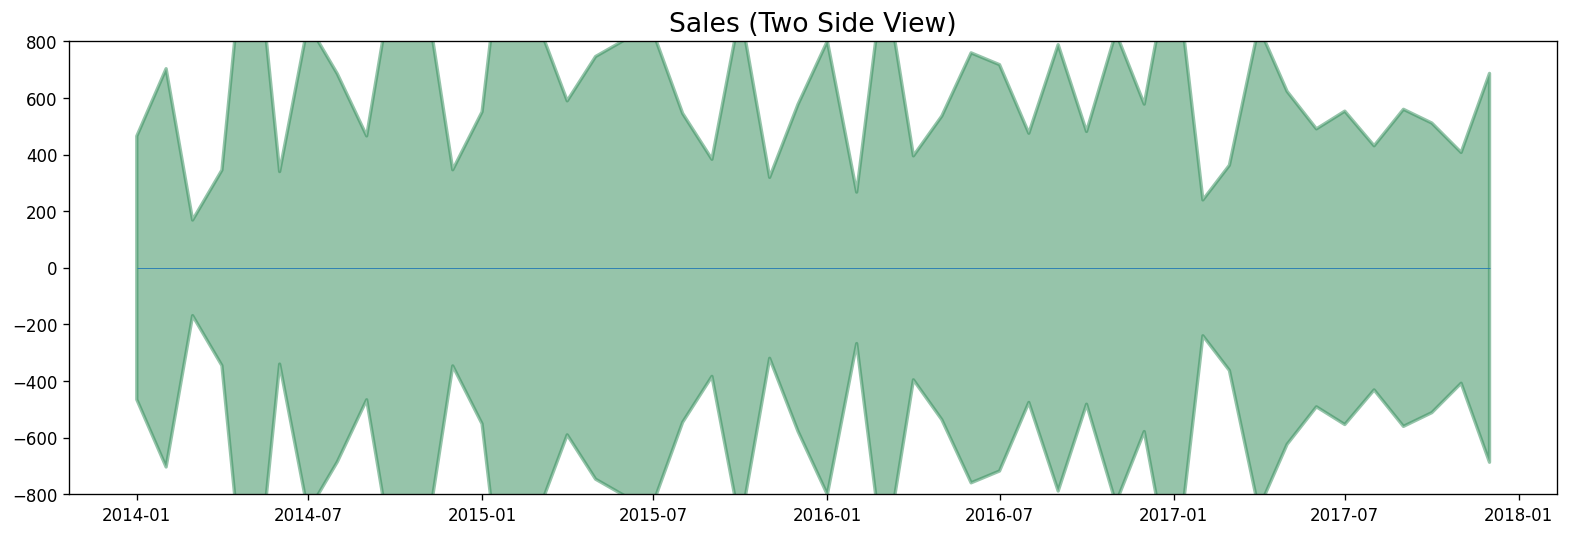

In [14]:
x= monthly_OS.index
y1= monthly_OS['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(monthly_OS.index), xmax=np.max(monthly_OS.index), linewidth=.5)
plt.show()

We can nicely visualize the trend and how it varies each year in a nice year-wise boxplot. 

Likewise, we can do a month-wise boxplot to visualize the monthly distributions. 

Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution 

We can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

In [15]:
OS['year'] = [d.year for d in OS.index]
OS['month'] = [d.strftime('%b') for d in OS.index]
years= OS['year'].unique()
years

array([2016, 2015, 2014, 2017])

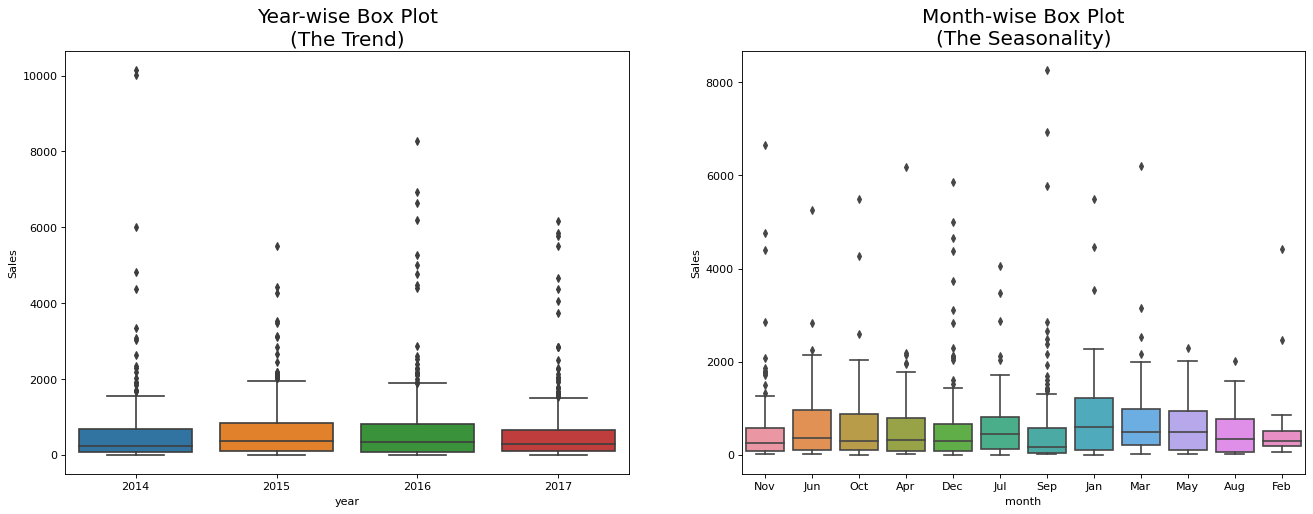

In [16]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Sales', data=OS, ax=axes[0])
sns.boxplot(x='month', y='Sales', data=OS.loc[~OS.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

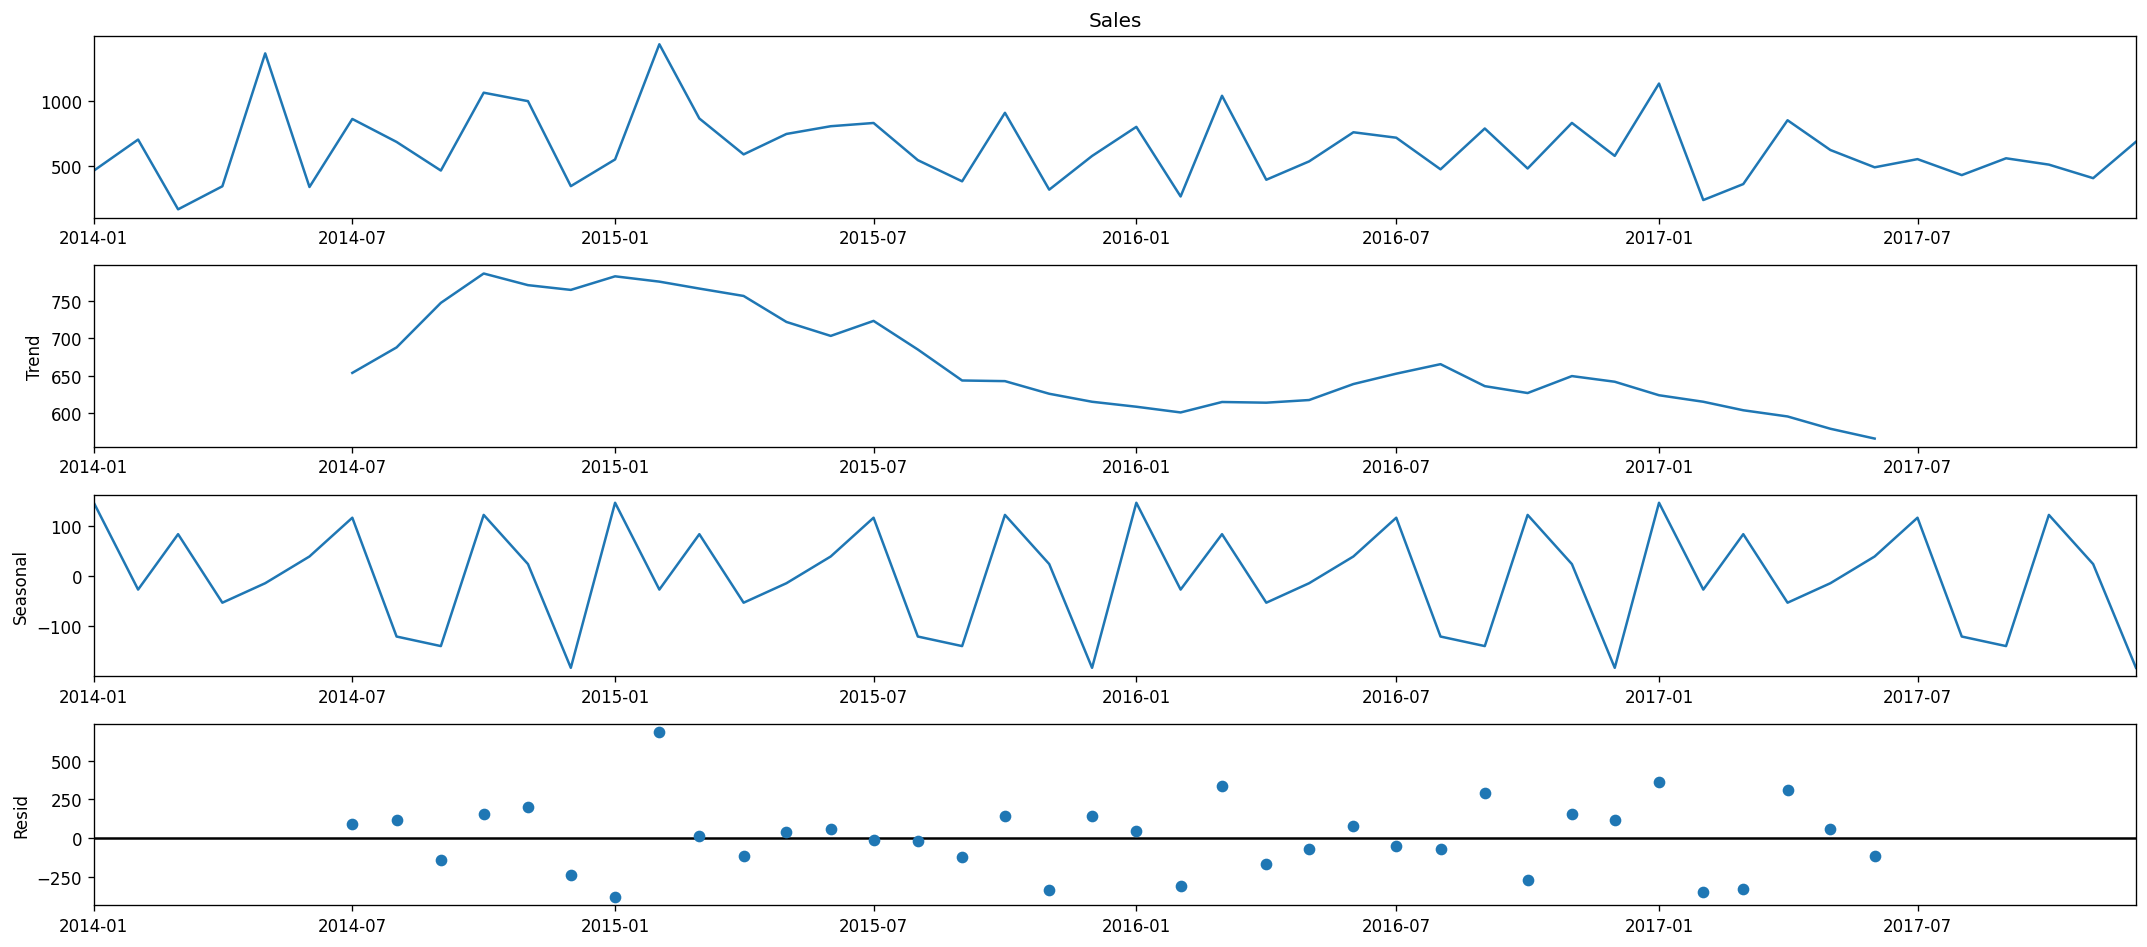

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_OS['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

The plots show the data is seasonality

# <a id='4.6'> 6. Check Stationary of the Dataset </a>

 Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

- constant mean
- constant variance
- an autocovariance that does not depend on time.

Formally, we check the stationary using the following:

- Plotting Rolling Statistic: we can plot the moving average or moving variance and see if it varies with time.

- Dickey- Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

### First, we will plot the Rolling Statistics Plot

In [18]:
#Determing rolling statistics
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

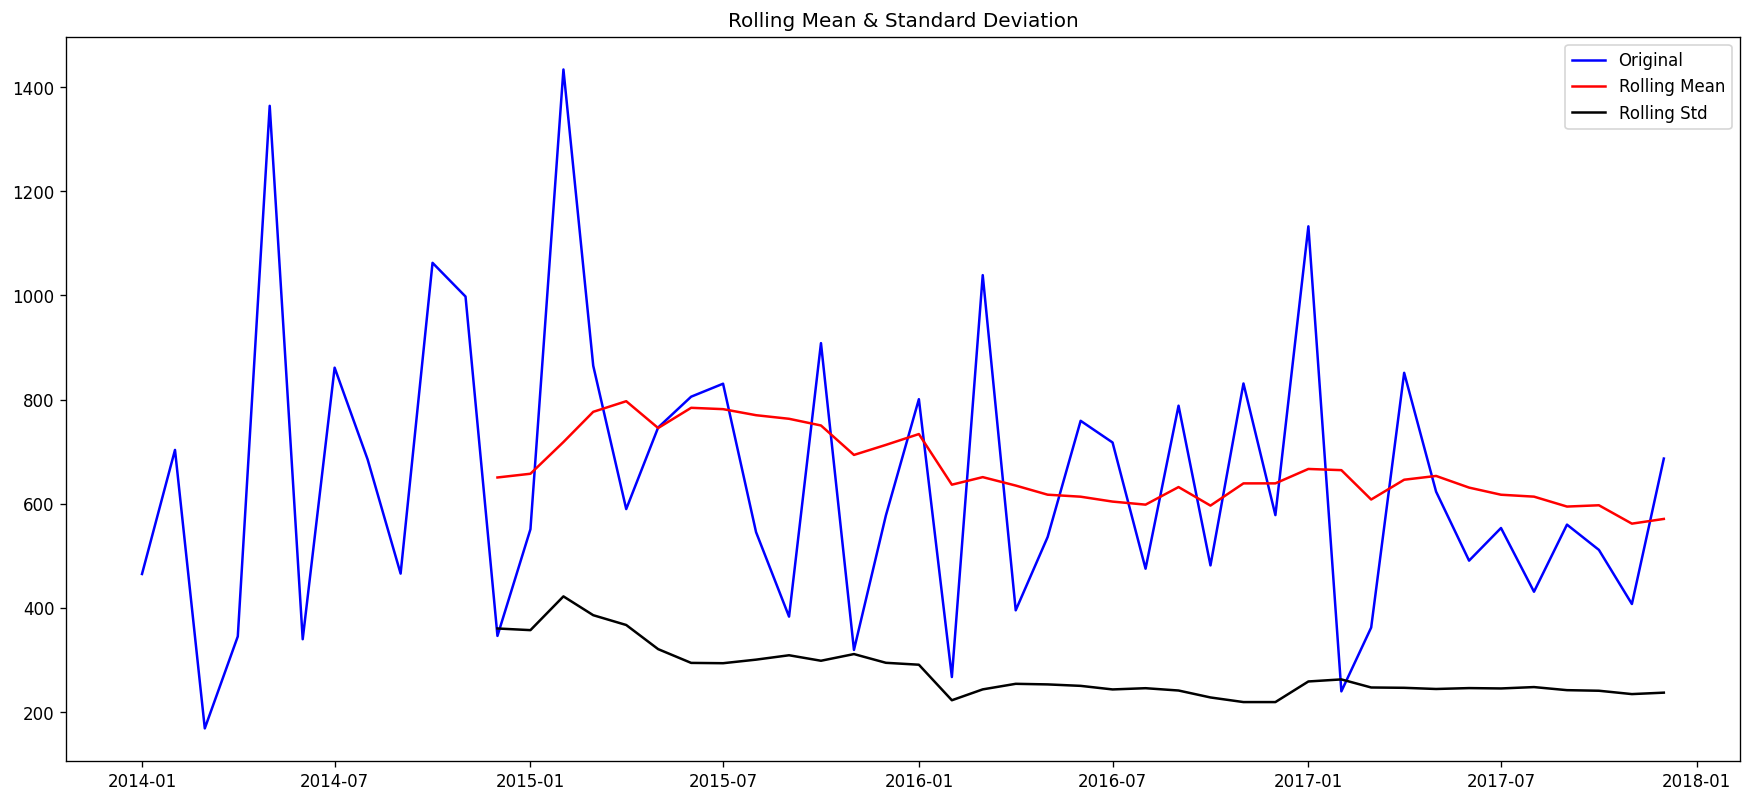

In [19]:
#Plot rolling statistics:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Now, we will conduct the Dickey-Fuller test:


In [20]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.630238
p-value                         0.467366
#Lags Used                      4.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


Here’s how to interpret the most important values in the output:

Test statistic: -1.630238

P-value: 0.467366

Since the p-value is not less than .05, we fail to reject the null hypothesis.

This means the time series is <span style="color:red"> non-stationary. </span>

In other words, it has some time-dependent structure and does not have constant variance over time.

# <a id='4.7'> 7. Make a Time Series Stationary </a>

There are several method to make a time series stationary:

- Take a log transform
- Moving average
- Exponentially weighted moving average
- Difference
- Decomposition

 Some might work well in this case and others might not. But the idea is to get a hang of all the methods and not focus on just the problem at hand.
 
 Let's started!

## a) Log Transform:

In [21]:
do= pd.read_csv('../input/dataset-superstore-20152018/Dataset- Superstore (2015-2018).csv')
store= do.loc[do['Category']=='Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
store.drop(cols, axis=1, inplace=True)
store

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order Date,Sales
2,2016/06/12,14.620
4,2015/10/11,22.368
6,2014/06/09,7.280
8,2014/06/09,18.504
9,2014/06/09,114.900
...,...,...
9982,2016/09/22,35.560
9984,2015/05/17,31.500
9985,2015/05/17,55.600
9992,2017/02/26,29.600


In [22]:
store = store.groupby('Order Date')['Sales'].sum().reset_index()
store

,Order Date,Sales
0,2014/01/03,16.448
1,2014/01/04,288.060
2,2014/01/05,19.536
3,2014/01/06,685.340
4,2014/01/07,10.430
...,...,...
1143,2017/12/26,814.594
1144,2017/12/27,13.248
1145,2017/12/28,1091.244
1146,2017/12/29,282.440


In [23]:
store = store.set_index('Order Date')
store.index

Index(['2014/01/03', '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07',
       '2014/01/09', '2014/01/10', '2014/01/13', '2014/01/16', '2014/01/18',
       ...
       '2017/12/21', '2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2017/12/27', '2017/12/28', '2017/12/29', '2017/12/30'],
      dtype='object', name='Order Date', length=1148)

In [24]:
#create new DataFrame:
store.index = pd.to_datetime(store.index)

y = store['Sales'].resample('MS').mean()


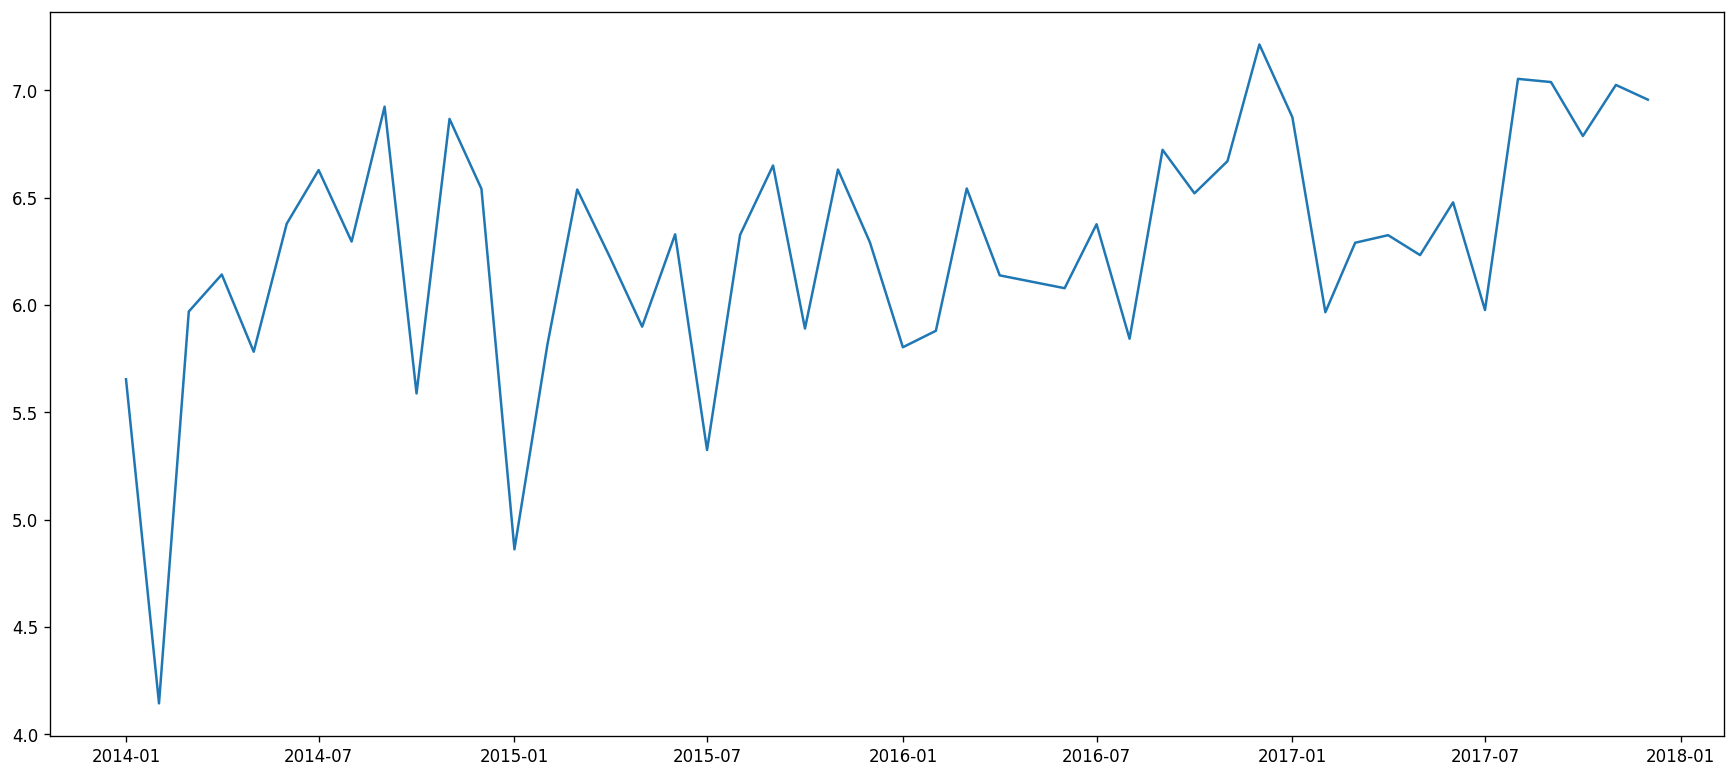

In [25]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

In this case, we can see the plot is not a forward trend in the data. So, take a log transform is not a solution to make a time-series stationary

## b) Moving Average: 

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values.

Pandas has specific functions defined for determining rolling statistics.

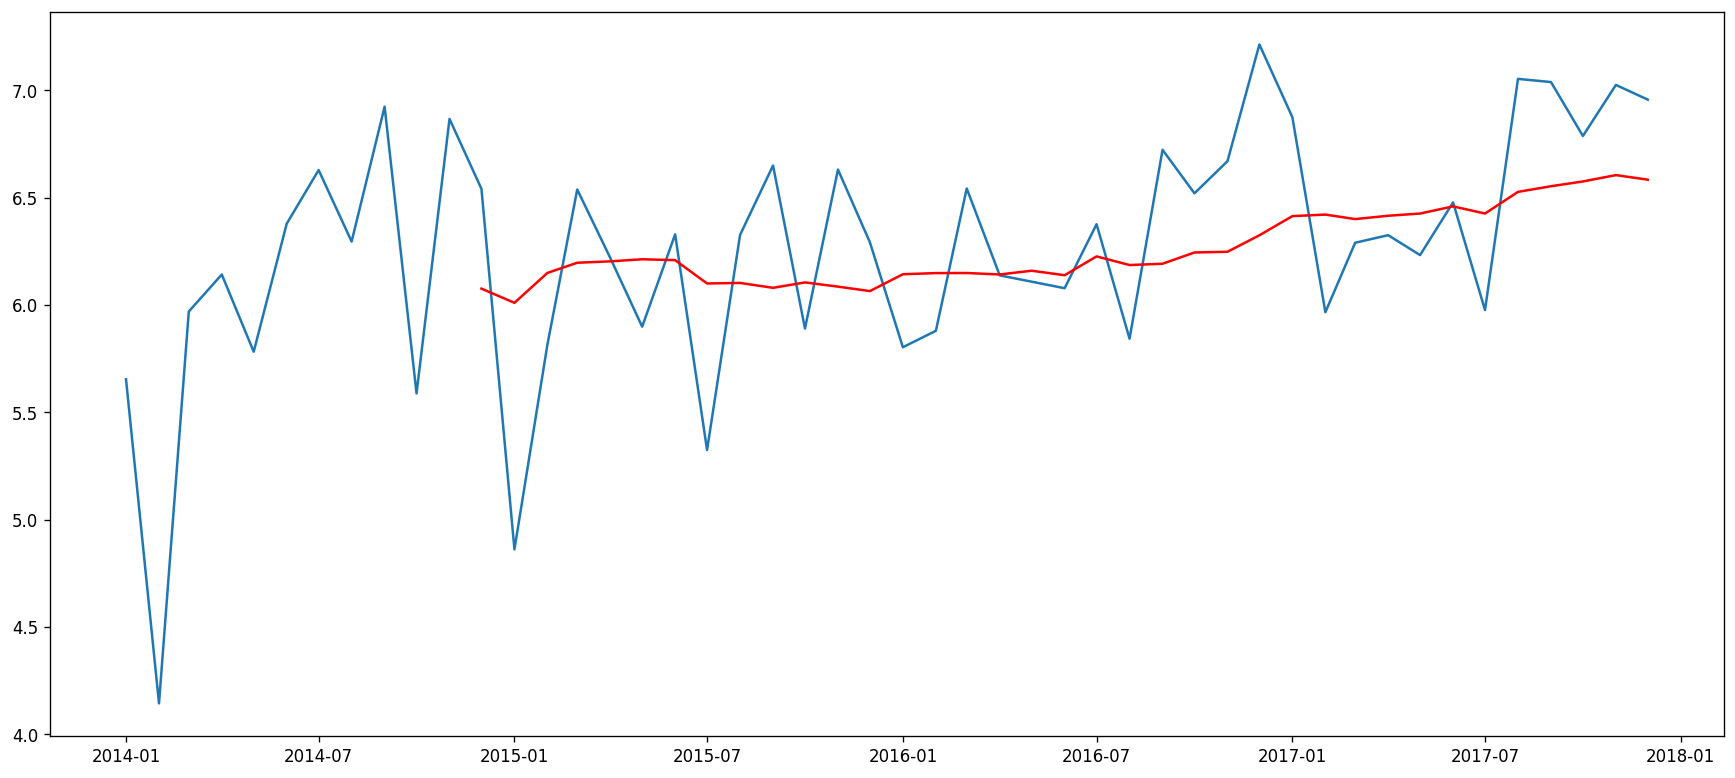

In [26]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. 

Lets subtract this from the original series. 

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [27]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Order Date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.464652
Freq: MS, Name: Sales, dtype: float64

Notice the first 11 being Nan.

Lets drop these NaN values and check the plots to test stationarity.

In [28]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

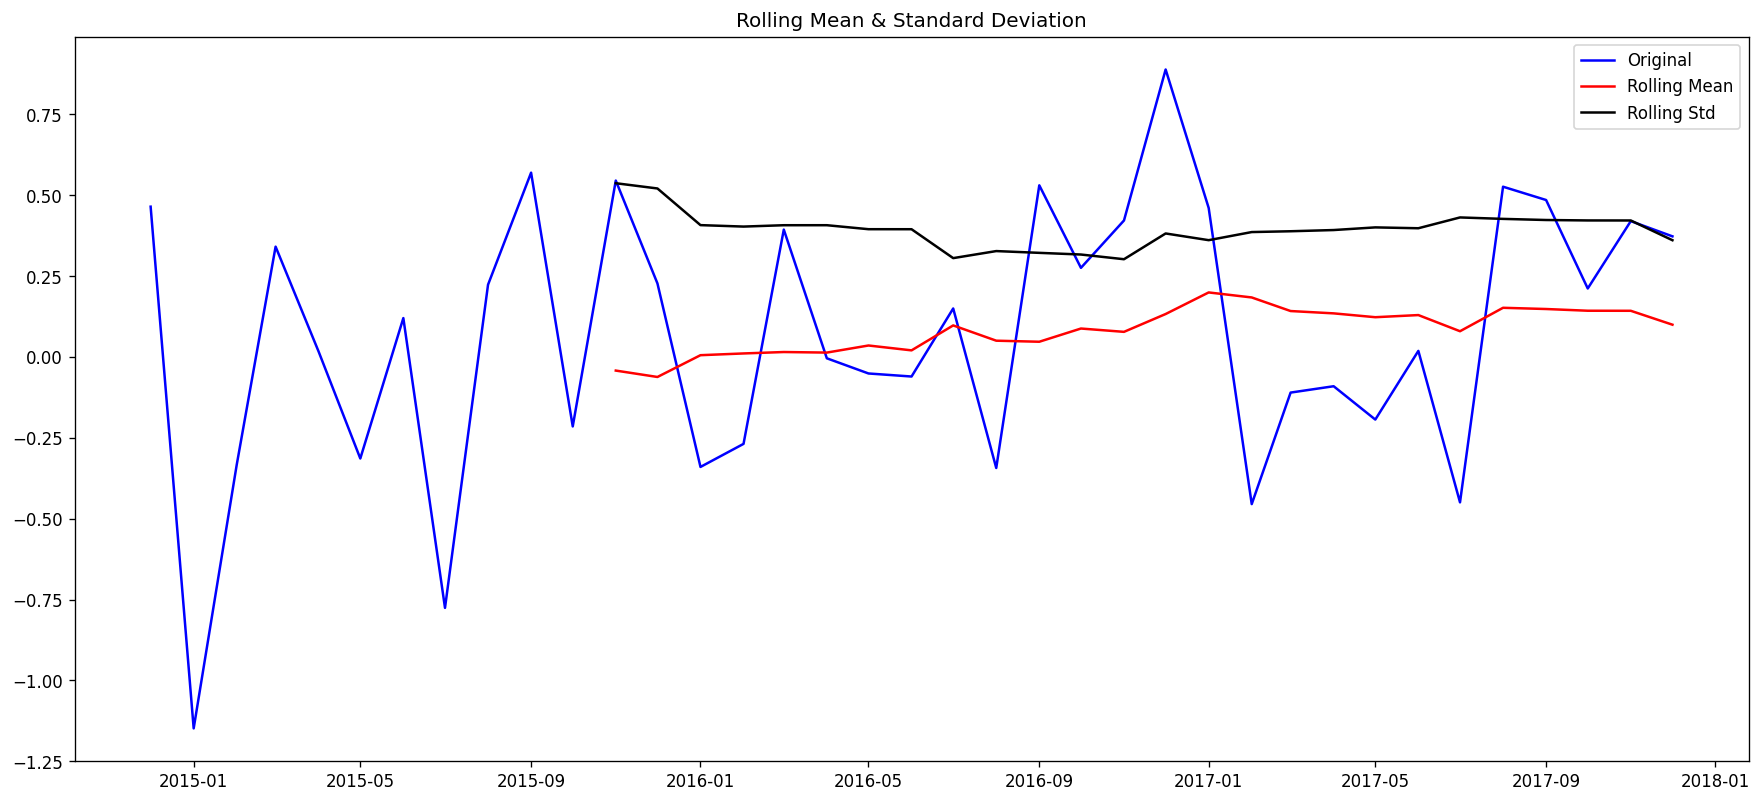

Results of Dickey-Fuller Test:
Test Statistic                 -5.626996
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

This looks like a much better series. 

The rolling values appear to be varying slightly but there is no specific trend. 

Also, the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series.

## c) Exponentially weighted moving average:

However, a drawback in this particular approach is that the time-period has to be strictly defined.

So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. 

A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. 

This can be implemented in Pandas as:

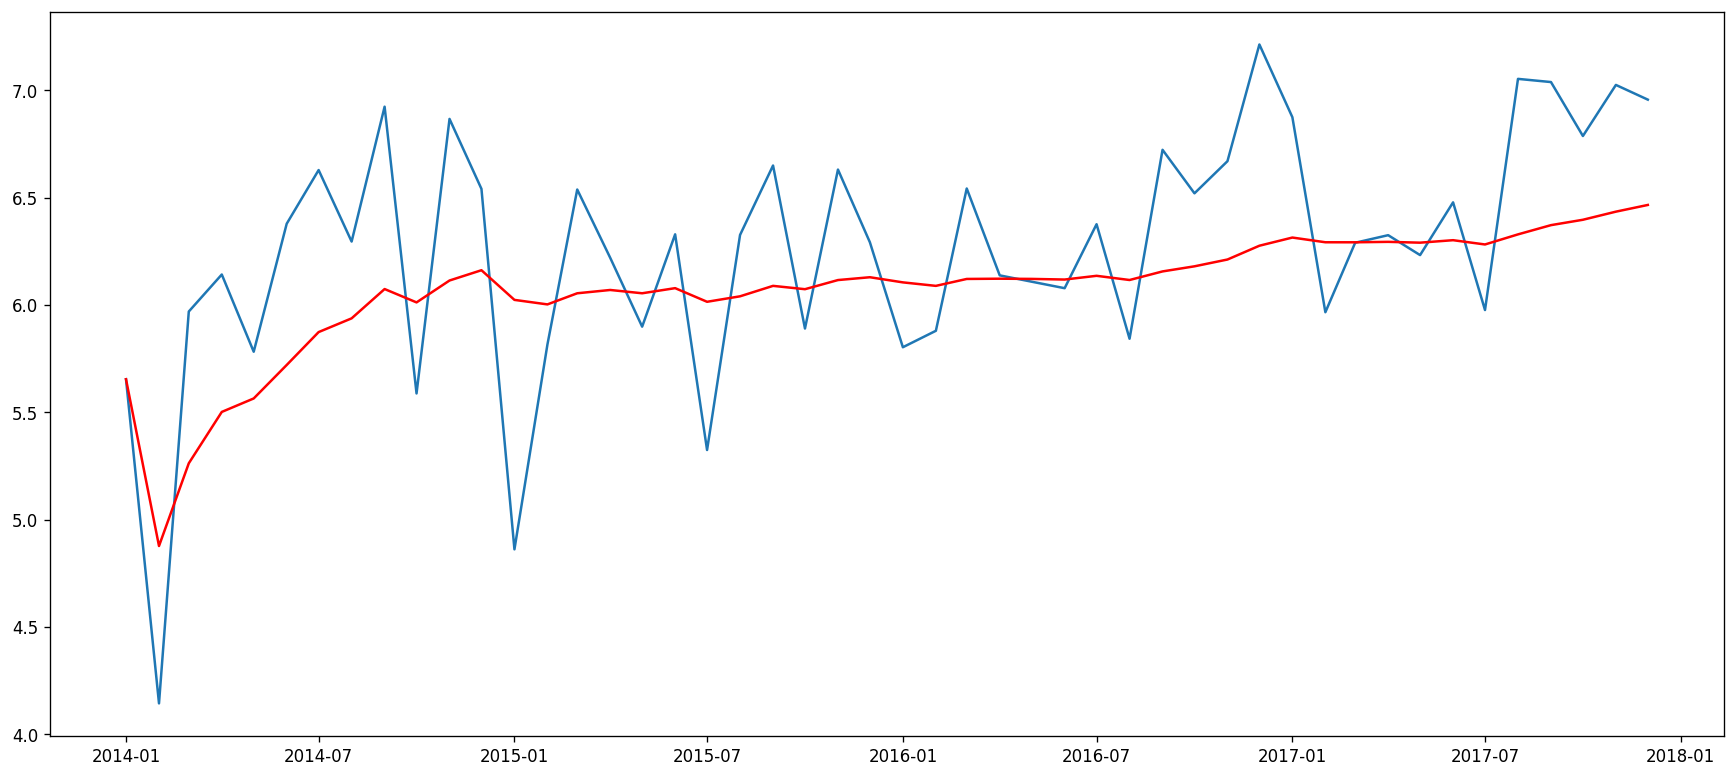

In [30]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. 
This is just an assumption here and would depend largely on the business domain. 

Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above. 

Now, let’s remove this from series and check stationarity:

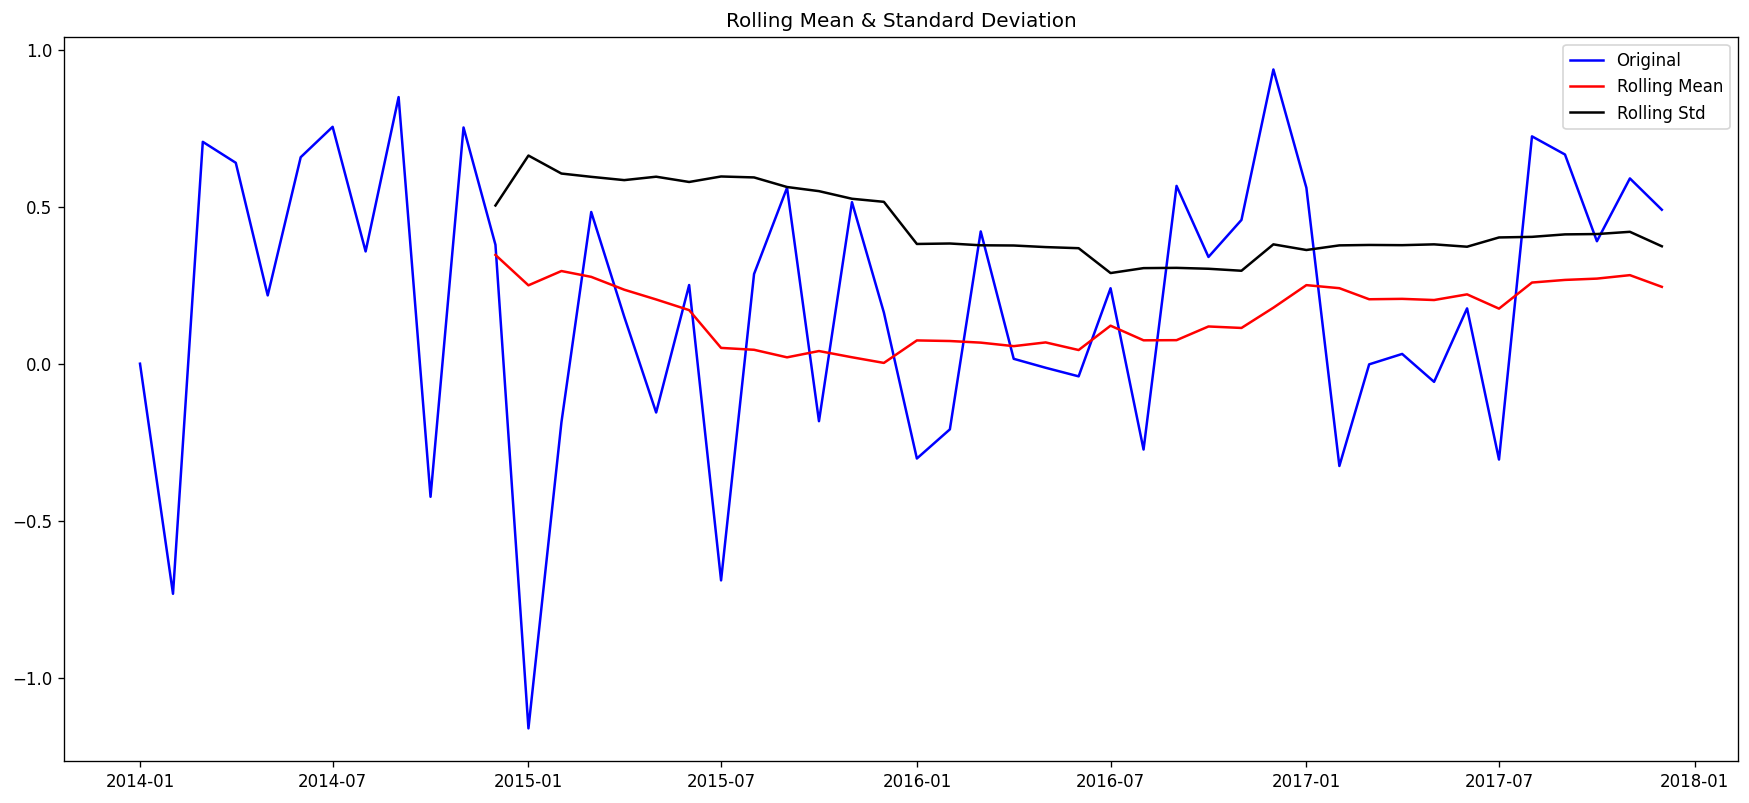

Results of Dickey-Fuller Test:
Test Statistic                 -2.967356
p-value                         0.038057
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [31]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


Since the p-value is  less than .05, we fail to acept the null hypothesis: this time-series is stationary

## d) Differencing: 

One of the most common methods of dealing with both trend and seasonality is differencing.

In this technique, we take the difference of the observation at a particular instant with that at the previous instant. 


This mostly works well in improving stationarity.

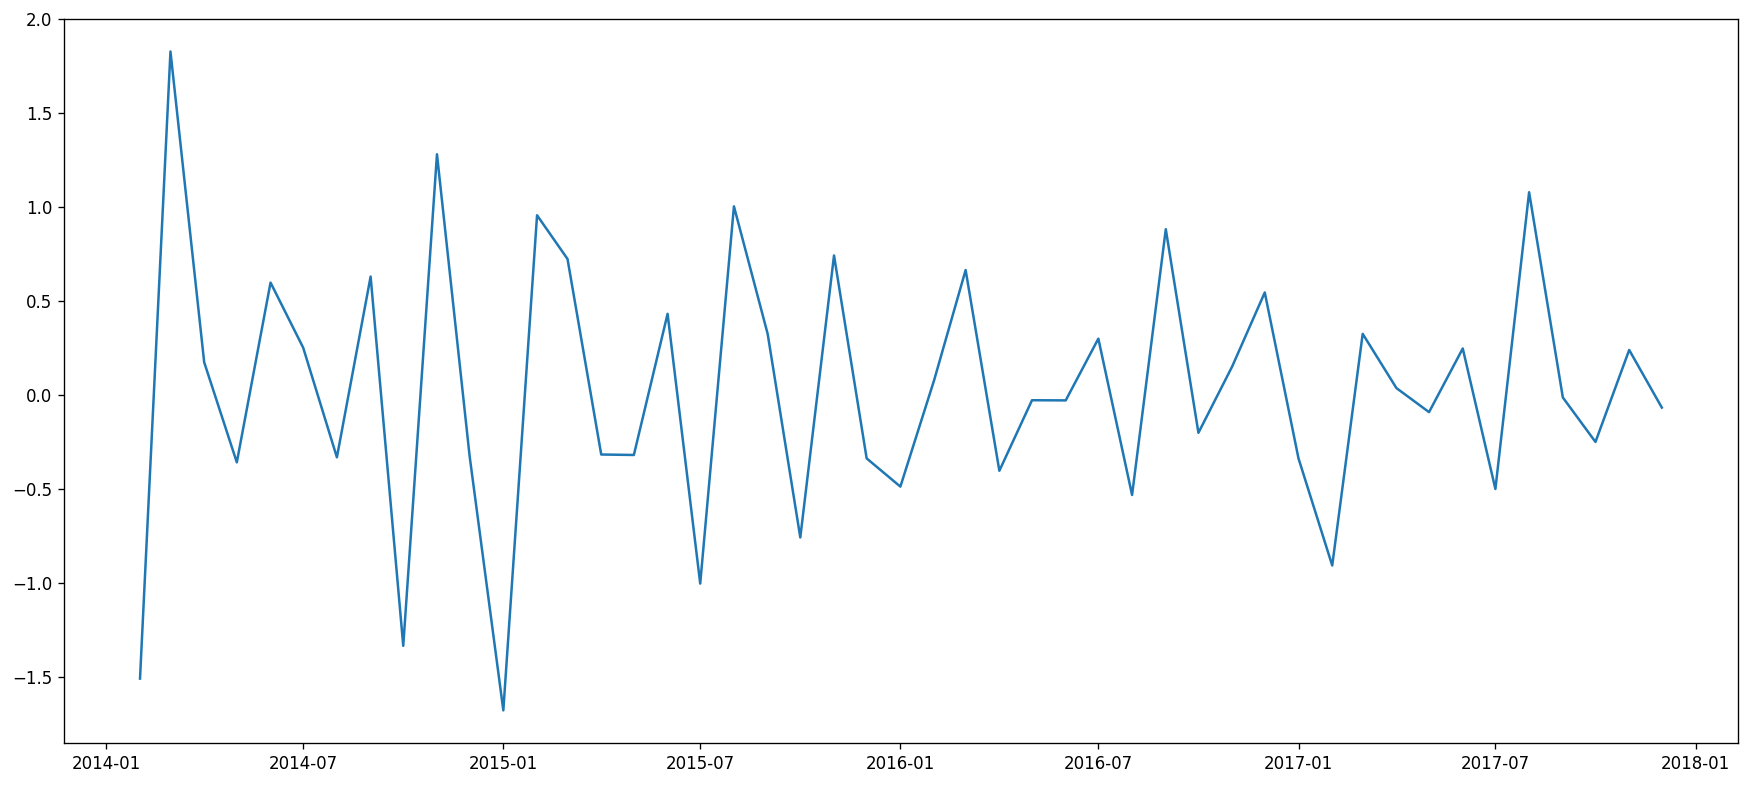

In [32]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

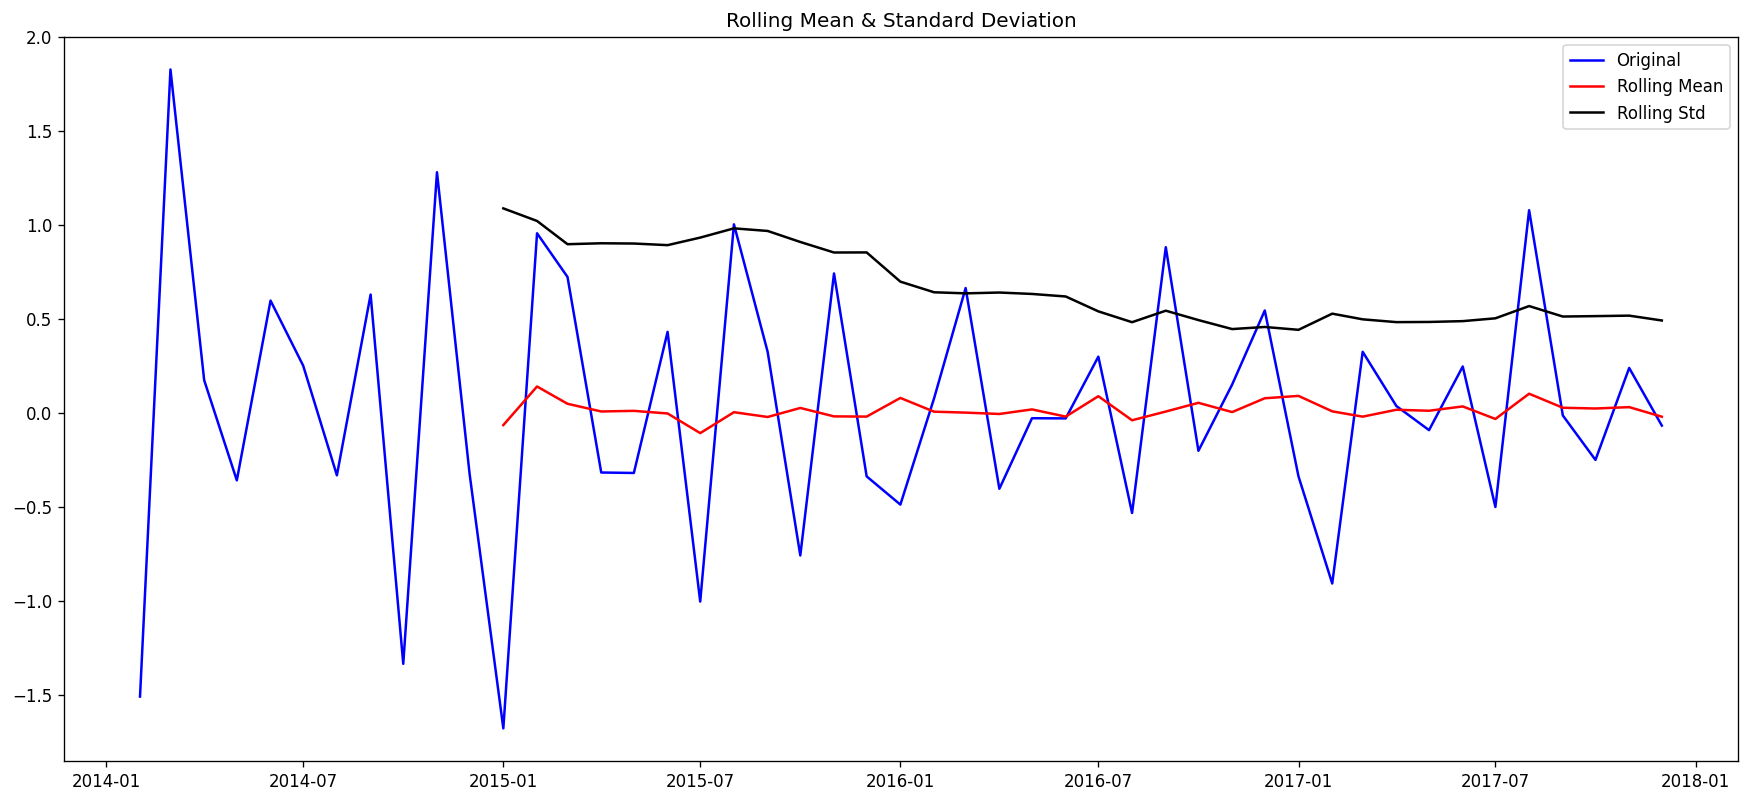

Results of Dickey-Fuller Test:
Test Statistic                 -4.771865
p-value                         0.000062
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [33]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time.

Also, the Dickey-Fuller test statistic is less than the 1% critical value, thus the TS is stationary with 99% confidence.



## e) Decomposing:

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

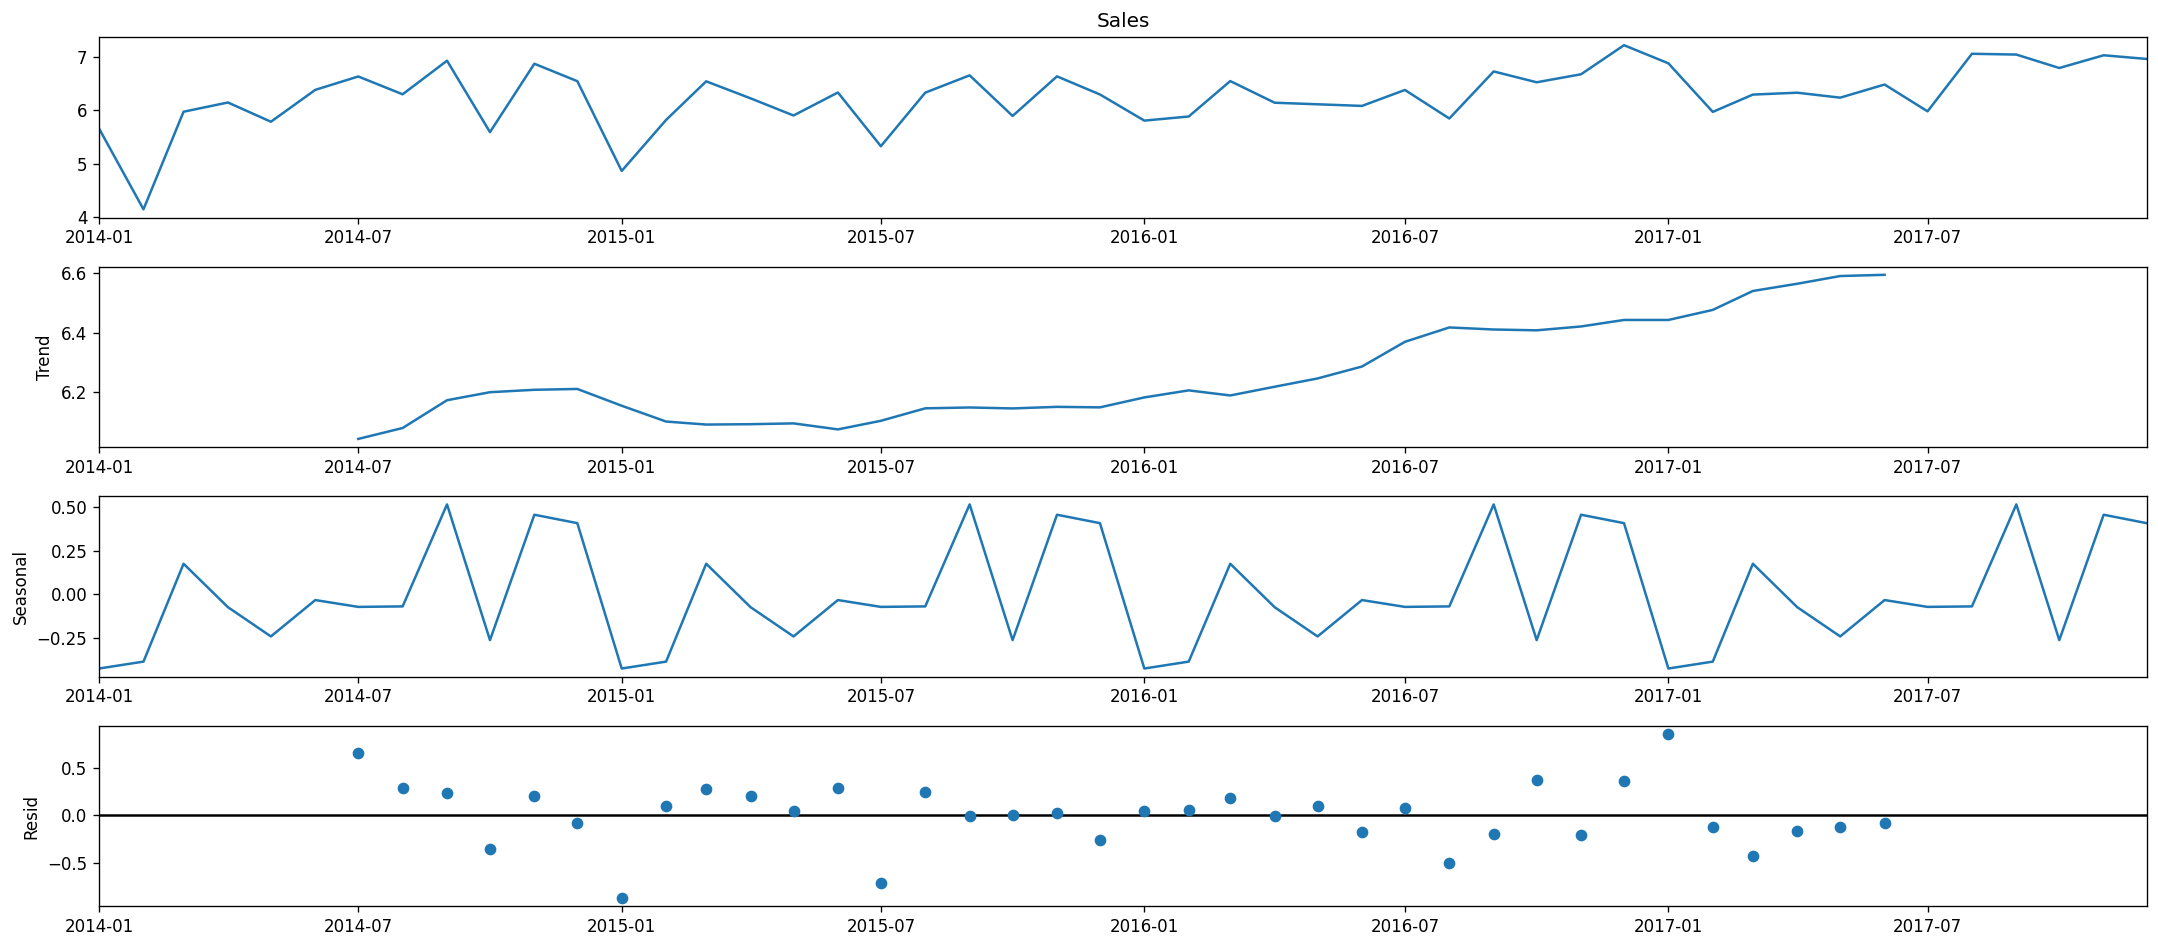

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. 

Lets check stationarity of residuals:

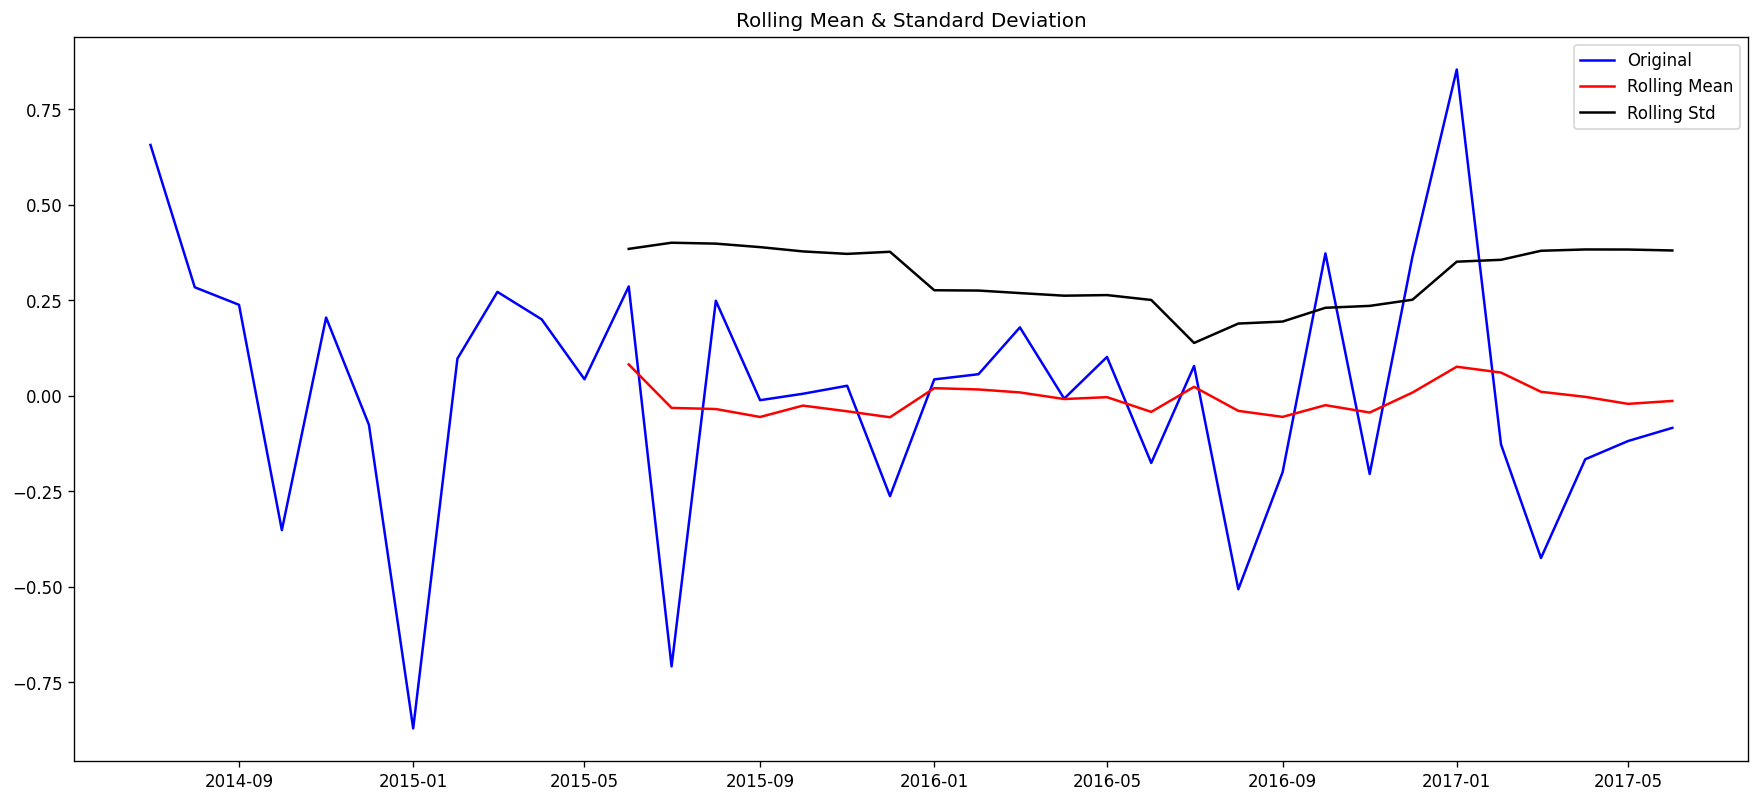

Results of Dickey-Fuller Test:
Test Statistic                 -4.901459
p-value                         0.000035
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


The Dickey-Fuller test statistic is significantly lower than the 1% critical value. 

So this TS is very close to stationary.

# <a id='4.8'> 8. Time Series Forecasting with ARIMA </a>

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA stands for Auto-Regressive Integrated Moving Averages.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

- **Number of AR (Auto-Regressive) terms (p):** AR terms are just lags of dependent variable. 


- **Number of MA (Moving Average) terms (q):** MA terms are lagged forecast errors in prediction equation. 

- **Number of Differences (d):** These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

There are 3 way to define p,q,d:

* ACF and PACF plot

* Auto_arima

* Loops

In this project I will use auto_arima function to decide p,q,d

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

I will split the train and test set, apply autoarima to decide p,q,d. Then get the predicted value for test set,plot the train,test, prect data and then evaluate the forcast accuracy. 

If the result from forecast accuracy doesn't support the ARIMA model, we should choose different method to forecast the data. One suggestion is Seasonal ARIMA model called SARIMAX

Let's get started!


## <a id='4.9'> 8.1. Train Test Split: </a>

In [36]:


train= y[:40]
test= y[40:]





In [37]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

     |████████████████████████████████| 1.8 MB 11.3 MB/s            
     |████████████████████████████████| 15.7 MB 49.4 MB/s            
     |████████████████████████████████| 9.9 MB 47.1 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
thinc 8.0.15 requires typing-exten

## <a id='4.10'> 8.2 Hyperparameters of ARIMA model p,d,q using auto_arima </a>

In [38]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=592.497, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=576.965, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=559.020, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=554.143, Time=0.13 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=555.183, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=555.965, Time=0.23 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 1.836 seconds


ARIMA(order=(3, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [39]:

auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=682.234, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=673.518, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=680.349, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=666.940, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=668.928, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=668.928, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=670.928, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=665.748, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=671.902, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=667.718, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=667.709, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=666.599, Time=0.0

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## <a id= '4.11' > 8.3  Build ARIMA model: </a>

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -273.088
Date:                Thu, 06 Jul 2023   AIC                            552.176
Time:                        15:19:31   BIC                            557.167
Sample:                    01-01-2014   HQIC                           553.967
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.249      0.573      0.567      -0.345       0.630
ma.L1         -0.9118      0.143     -6.398      0.000      -1.191      -0.632
sigma2      6.796e+04   1.48e+04      4.607      0.000     3.9e+04    9.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.60   Prob(JB):                         0.51
Heteroskedasticity (H):               0.84   Skew:                             0.45
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict test dataset: 

In [41]:
pred= model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

2017-05-01    609.236644
2017-06-01    616.500443
2017-07-01    617.534859
2017-08-01    617.682167
2017-09-01    617.703144
2017-10-01    617.706132
2017-11-01    617.706557
2017-12-01    617.706618
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
test

Order Date
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

## <a id ='4.12'> 8.4. ARIMA- Model Evaluation: using MAPE </a>

Mean Absolute Percentage Error (MAPE):  MAPE is defined as the percentage of the average of absolute difference between forecasted values and true values, divided by true value.

In [43]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.363205


The lower the MAPE, the better the model is. Our model have considerably high MAPE. 

Let's plot the predict value to see what can be the reason for the low accuracy

## <a id='8.13'> 8.5. Plot prediction for test value:</a>

<AxesSubplot:xlabel='Order Date'>

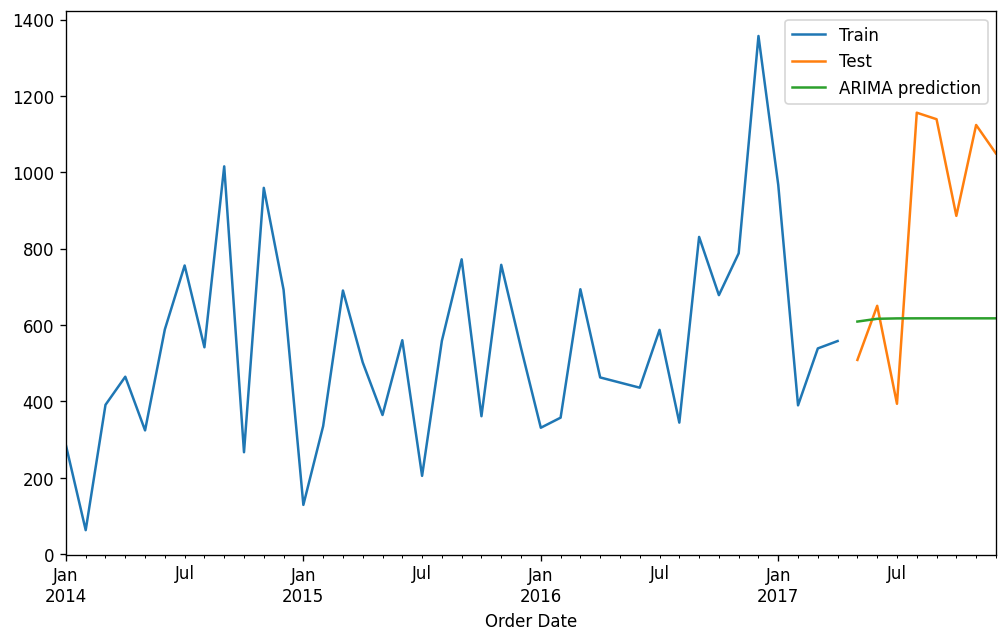

In [44]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

## The problem of ARIMA prediction is it doesnt show the season trend of data. 

## The solution for this problem is using Seasonal ARIMA called SARIMAX function!

## <a id='9'>9. FORECAST DATA USING SARIMAX model:</a>

In [45]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79193D+00    |proj g|=  7.99194D-02

At iterate    5    f=  4.75725D+00    |proj g|=  2.20420D-02

At iterate   10    f=  4.75546D+00    |proj g|=  7.72465D-04

At iterate   15    f=  4.75499D+00    |proj g|=  5.67592D-03

At iterate   20    f=  4.73881D+00    |proj g|=  5.05180D-02

At iterate   25    f=  4.73188D+00    |proj g|=  7.83322D-03

At iterate   30    f=  4.73136D+00    |proj g|=  7.12500D-04

At iterate   35    f=  4.73129D+00    |proj g|=  6.85744D-04

At iterate   40    f=  4.73127D+00    |proj g|=  3.92378D-04

At iterate   45    f=  4.73108D+00    |proj g|=  6.41897D-04

At iterate   50    f=  4.73107D+00    |proj g|=  3.38067D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -189.243
Date:                            Thu, 06 Jul 2023   AIC                            388.486
Time:                                    15:19:38   BIC                            394.965
Sample:                                01-01-2014   HQIC                           390.413
                                     - 04-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2075      0.300      0.693      0.489      -0.380       0.795
ma.L1         -0.9253      0.326     -2.839      0.005      -1.564      -0.286
ar.S.L12       0.2317      0.758      0.305      0.760      -1.255       1.718
ma.S.L12      -0.9971      0.465     -2.143      0.032      -1.909      -0.085
sigma2      4.794e+04   9.81e-06   4.89e+09      0.000    4.79e+04    4.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               2.18   Skew:                             0.63
Prob(H) (two-sided):                  0.26   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.67e+26. Standard errors may be unstable.
"""

In [46]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2017-05-01     524.245522
2017-06-01     636.979984
2017-07-01     686.349438
2017-08-01     583.601864
2017-09-01     997.210164
2017-10-01     638.870800
2017-11-01     957.407646
2017-12-01    1119.324792
Freq: MS, Name: predicted_mean, dtype: float64

## Plot Forecast Data:

<AxesSubplot:xlabel='Order Date'>

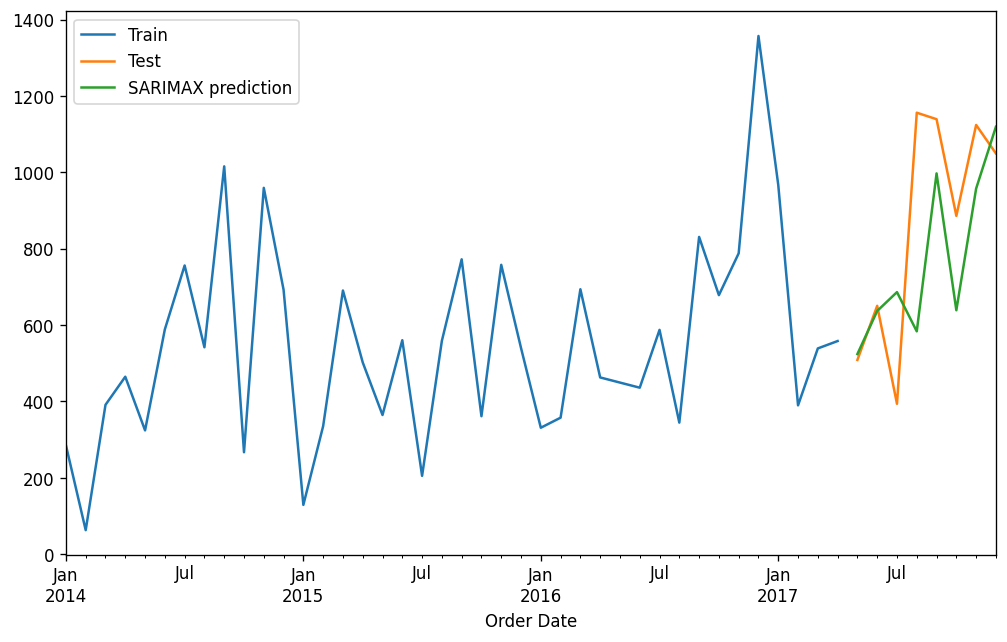

In [47]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

# <a id='9.1'> 9.1 SARIMAX MODEL EVALUATION:  MAPE </a>

In [48]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.238381


### The model is improved!!! We can coutinue use SARIMAX to forecast the Office Supplier's Sale

## <a id='9.2'> 9.2. PREDICT FUTURE SALE WITH ARIMAX:</a>

In [49]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2018-01-01     733.865582
2018-02-01     467.398664
2018-03-01     714.996393
2018-04-01     671.129843
2018-05-01     602.604323
2018-06-01     738.389077
2018-07-01     762.834934
2018-08-01     692.288054
2018-09-01    1089.011560
2018-10-01     682.953021
2018-11-01    1049.907246
2018-12-01    1117.481887
2019-01-01     733.084608
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

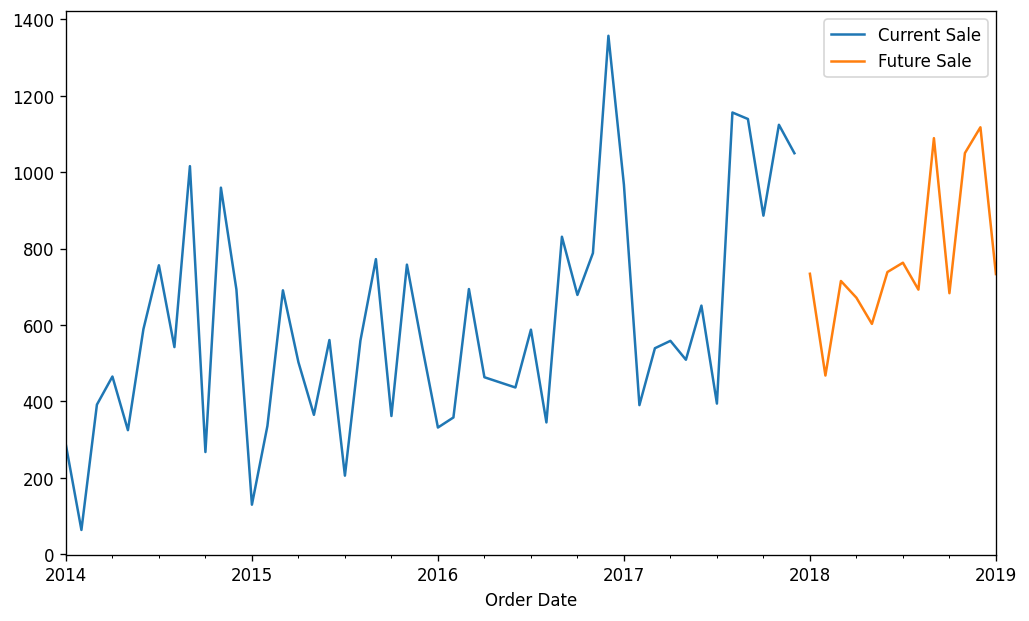

In [50]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')


# THE END

Thank you for spending time checking my kernel.

Please leave comment and like this kernel if you think it's helpful.

Thank you!